# Taller de Python y Pillow

Bienvenido/a al taller de Python y Pillow. En este taller vamos a realizar distintos ejercicios con imágenes. Utilizaremos las siguientes herramientas:

1. Python 3 como lenguaje de programación,
2. la librería para trabajar con imágenes Pillow [https://pillow.readthedocs.io/en/stable/]
3. SDK de Mapbox para Python [https://github.com/mapbox/mapbox-sdk-py/]

In [1]:
# para ejecutar una celda pulsa Mayúsculas + Intro
import os  # importamos librería de llamadas al sistema operativo
from io import BytesIO
from PIL import Image, ImageFont, ImageDraw, ImageColor, ExifTags
from IPython.display import Image as IPython_Image # para mostrar imágenes en el notebook
from IPython.core.debugger import set_trace
from typing import Dict, List
from mapbox import Geocoder, Static


def get_files_from_path(path: str) -> List:
    """
    Función para extraer los archivos de un directorio
    
    :param path: path al directorio
    :type path: str
    :returns: lista con el nombre de ficheros dentro del directorio
    :rtype: list
    """
    for root, dirs, files in os.walk(path):
        return files

def get_exif_data(path: str) -> Dict:
    """
    Devuelve un diccionario con todos los datos Exif de una imagen
    
    :param path: path a la imagen
    :type path: str
    :returns: diccionario con los datos Exif
    :rtype: Dict
    """
    
    img = Image.open(path)
    return {ExifTags.TAGS[k]: v for k, v in img._getexif().items() if k in ExifTags.TAGS}

### Ejercicio 1

Imprime por pantalla el nombre y el ancho y alto de las imágenes que hay en el directorio ./1/input. 

El archivo ./1/input/cuervo_300_200.jpg tiene 300x200 píxeles


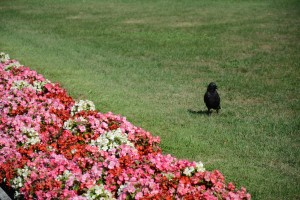

El archivo ./1/input/rio_638_425.jpg tiene 638x425 píxeles


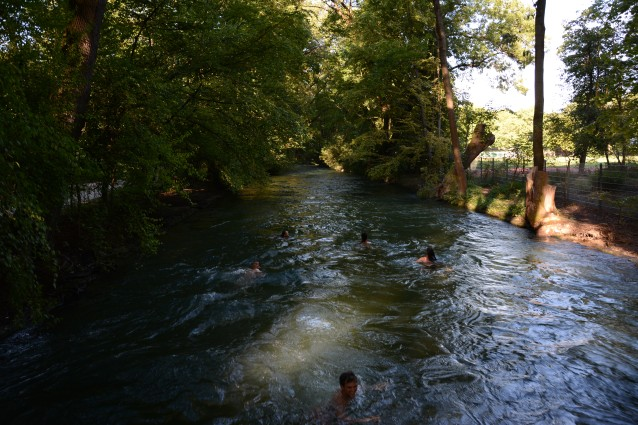

El archivo ./1/input/torres_570_380.jpg tiene 570x380 píxeles


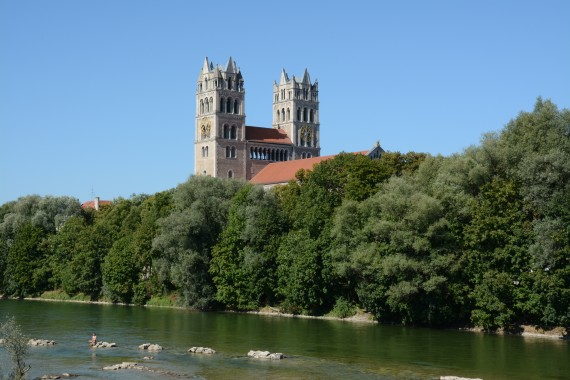

In [2]:
def print_info(image_path: str):
    """
    Función que imprime por pantalla el path a la imagen, el ancho y el alto (en píxeles) y
    después muestra la imagen en el notebook de Jupyter
    
    :param path: path de la imagen
    :type path: str
    """

    img = Image.open(image_path)
    message = "El archivo {path} tiene {width}x{height} píxeles"\
        .format(path=image_path, width=img.width, height=img.height)
    img.close() 
    print(message)
    display(IPython_Image(filename=image_path))

input_path = './1/input'
files = get_files_from_path(input_path)
for file in files:
    absolute_path = os.path.join(input_path, file)
    print_info(absolute_path)
    

### Ejercicio 2

Crear una imagen de 800x400 con fondo azul. Dibuja en ella un cuadrado verde y un circulo amarillo.

Tareas:

1. Crea una imagen con Image.new()
2. Rellena la imagen de azul con ImageDraw.floodfill(image, coord, color) donde image es la imagen creada en el punto anterior, coord es el punto donde se empezará a rellenar y color es blue 
3. Crear un objeto para dibujar con ImageDraw.Draw(image) pasándole la imagen creada en el punto 1
4. Dibuja un cuadrado verde con ImageDraw.rectangle((x0, y0, x1, y1), fill=green) y un círculo amarillo con ImageDraw.ellipse((x0, y0, x1, y1), fill=yellow)
5. Guarda la imagen como PNG en output_path con el método save()

In [ ]:
def create_image(output_path: str):
    blue = ImageColor.getrgb("blue")
    green = ImageColor.getrgb("green")
    yellow = ImageColor.getrgb("yellow")
    
    # TODO


output_path = './2/output/draw.png'
create_image(output_path)
# display(IPython_Image(filename=output_path))

### Ejercicio 3

En el ejercicio 1 se pidió que se imprimiese cierta información por pantalla. En el ejercicio 2 se solicita lo mismo, pero en vez de imprimir en pantalla hazlo en una imagen.

Tareas:

1. Crea una imagen con Image.new como en el ejercicio 2
2. Crea una imagen para poder escribir con ImageDraw.Draw como en el ejercicio 2
3. Crea un bucle dentro de la función print_files2 que recorra input_path similar al ejercicio 1
4. Abre la imagen y genera el mensaje como en el ejercicio 1. 
5. Puedes escribir toda la información de golpe en la imagen con el método multiline_text (tendrás que poner un salto de línea al final de cada línea) o cada vez que leas una imagen con el método text (tendrás que calcular la posición x, y de cada mensaje para que no se sobreescriban).
6. Guarda la imagen generada en output_path

In [ ]:
def print_files2(input_path: str, output_path: str):
    message = ''
    font = ImageFont.truetype('./fonts/FreeMono.ttf', 14)
    red = ImageColor.getrgb("red")
    
    # TODO


input_path = './3/input'
output_path = './3/output/message.jpg'
print_files2(input_path, output_path)
# display(IPython_Image(filename=output_path))

### Ejercicio 4

Supongamos que tenemos una recopilación de nuestros 9 álbumes musicales preferidos en un único CD o DVD y queremos hacer una carátula con las 9 portadas de los álbumes (3x3). En ./4/input/ tenemos 9 imágenes de portadas de discos (768x768 píxeles). Generar una nueva imagen caratula.jpg en el directorio ./4/output/ con las portadas de los álbumes.

Tareas:

1. Crea una imagen con Image.new con tamaño IMAGE_WIDTH * 3, IMAGE_HEIGHT * 3
2. Recorre input_path, abre cada una de las imágenes y copiala en la imagen que creaste en el punto 1 con el método paste
3. Tendrás que calcular la posición en la que tienes que colocar cada una de las portadas. En cada iteración del bucle puedes calcularla o recuperarla de una lista de tuplas donde en cada tupla guardas la posición x e y. En cualquier caso te será útil la función enumerate en el bucle for:

~~~~python
lista = ['azul', 'verde', 'amarillo']
for indice, color in enumerate(lista):
    print("{}-{}".format(indice, color))

0-azul
1-verde
2-amarillo
~~~~
4. Guarda la nueva imagen

In [ ]:
def make_cover(input_path: str, output_path: str):
    IMAGE_WIDTH = 768
    IMAGE_HEIGHT = 768

    # TODO

input_path = './4/input'
output_path = './4/output/cover.jpg'
make_cover(input_path, output_path)
# display(IPython_Image(filename=output_path))

### Ejercicio 5

Las cámaras de fotos digitales añaden metadatos de las imágenes tomadas en el propio archivo de la fotografía. Estos metadatos están en formato Exif [https://es.wikipedia.org/wiki/Exchangeable_image_file_format]. El formato Exif guarda fecha/hora en la que se tomó la foto, apertura y velocidad de obturador, distancia focal, tiempo de exposición, posición GPS (si la cámara o teléfono tiene GPS activo), etc.

En este ejercicio deberás leer la información Exif de la imagen que hay en ./5/input/read_exif.jpg con la función get_exif_data (está en la primera celda de código del notebook) e imprimirla por pantalla.

Pistas:

Puedes ver las claves de un diccionario con el método keys:

```python
mi_diccionario = {'a': 1, 'b': 2, 'c': 3}
mi_diccionario['a']  # devuelve 1
mi_diccionario.keys()  # devuelve las claves del diccionario
mi_diccionario.values()  # devuelve los valores del diccionario
mi_diccionario.items()  # devuelve los pares clave/valor
```


In [ ]:
input_path = './5/input/read_exif.jpg'
exif = get_exif_data(input_path)

# TODO


## Ejercicio 6

Para cada imagen en ./6/input/ lee la longitud y la latitud de los datos Exif con las funciones get_exif_data y get_coordinates. Con las coordenadas obtén la imagen del mapa correspondiente llamando a la función get_location_map y el nombre de la ciudad en la que se tomó la foto con get_location_name. Añade el mapa y el nombre de la ciudad a la imagen original, guarda el resultado en ./6/output/ y muéstralo por pantalla. Si te da tiempo, también puedes dibujar un cuadrado que enmarque la imagen del mapa.

Las funciones get_location_map y get_location_name usan los servicios de mapbox [https://github.com/mapbox/mapbox-sdk-py/]. Para usarlas necesitarás un token que conseguirás creando una cuenta en [https://developer.mapquest.com/plan_purchase/steps/business_edition/business_edition_free/register].

Tareas:

1. Consigue el token para usar la API de mapbox y asignaselo a la variable TOKEN
2. Abre la imagen que está en input_path
3. Recupera los datos Exif con get_exif_data
4. Obtén las coordenadas (longitud y latitud) con get_coordinates
5. Crea una nueva imagen con el resultado de la función get_location_map (Ojo: tendrás que llamar al método convert('RGB'), es decir, tendrás que hacer algo como Image.open(image_con_el_mapa).convert('RGB'))
6. Copia la imagen del mapa en la imagen del punto 2.
7. Crea una nueva imagen para escribir el nombre de la ciudad
8. Obtén el nombre de la ciudad con get_location_name y escríbelo en la imagen del punto 7 (puedes cambiar el tamaño de la fuente, el color...).
9. Dibuja un cuadrado alrededor de la imagen con el mapa.
10. Guarda la imagen en output_path
11. Muestra la imagen en output_path

In [3]:
TOKEN = ""

def get_location_map(longitude: str, latitude: str, width: int=200, height: int=200, zoom: int=14) -> BytesIO:
    service = Static(access_token=TOKEN)
    response = service.image('mapbox.streets',lon=longitude, lat=latitude, width=width, height=height, z=zoom)
    return BytesIO(response.content)

def get_location_name(longitude: str, latitude: str) -> str:
    geocoder = Geocoder(access_token=TOKEN, name='mapbox.places')
    response = geocoder.reverse(lon=-73.989, lat=40.733, limit=1, types=['place'])
    return response.geojson()['features'][0]['text']

def get_coordinates(exif_data: Dict) -> Dict:
    gps_info = exif_data['GPSInfo']

    degrees = int(gps_info[2][0][0]/gps_info[2][0][1])
    minutes = gps_info[2][1][0]/gps_info[2][1][1]
    seconds = gps_info[2][2][0]/gps_info[2][2][1]
    latitude = degrees + (minutes/60) + (seconds/3600)
    if gps_info[1] == 'S':
        latitude = -latitude

    degrees = int(gps_info[4][0][0]/gps_info[4][0][1])
    minutes = gps_info[4][1][0]/gps_info[4][1][1]
    seconds = gps_info[4][2][0]/gps_info[4][2][1]
    longitude = degrees + (minutes/60) + (seconds/3600)
    if gps_info[3] == 'W':
        longitude = -longitude

    return dict({"longitude": longitude, "latitude": latitude})
    
def add_map_to_image(input_path: str, output_path: str):
    MAP_WIDTH = 180
    MAP_HEIGHT = 180

    black = ImageColor.getrgb("black")
    font = ImageFont.truetype('./fonts/FreeMono.ttf', 14)
    
    # TODO

input_path = './6/input/'
output_path = './6/output/'

files = get_files_from_path(input_path)
for file in files:
    output_path_file = os.path.join(output_path, file)
    add_map_to_image(os.path.join(input_path, file), output_path_file)
    # display(IPython_Image(filename=output_path_file))